<a href="https://colab.research.google.com/github/artelist/Project-Akhir-DSU/blob/main/PeopleAnalytic_PrejectDSU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Overview
Menggunakan data yang ada, di sini akan diprediksi karyawan yang akan masuk ke dalam golongan best performance dan yang tidak.

##Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##Import Some Library

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
'Done'

'Done'

##Import Dataset

In [ ]:
data_train = pd.read_csv('/content/gdrive/My Drive/BRI_algoritma/train.csv')
print(data_train.shape)
data=data_train.copy()
data.head()

(11153, 22)


,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,level_0,2.86,2011,4,2,3,2,3,0,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,level_1,7.28,2007,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,level_1,0.00,1989,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,level_1,0.00,1987,29,11,6,0,4,10,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,level_1,7.20,1985,30,9,8,2,3,0,47.18,0.0,0


Data di atas memiliki 22 kolom dan 11153 baris, dengan deskripsi label sebagai berikut:
*   job_level : level jabatan pekerja
*   job_duration_in_current_job_level : Masa Kerja pada job level saat ini
*   person_level	: Level personal Pekerja
*   job_duration_in_current_person_level : Masa Kerja pada person level saat ini
*   job_duration_in_current_branch : Masa Kerja pada unit kerja saat ini
*   Employee_type : Tipe Pekerja
*   gender : Jenis Kelamin
*   age	: Usia(Tahun Kelahiran)
*   marital_status_maried(Y/N)	: Status Pernikahan (Y / N)
*   number_of_dependences : Jumlah anak dalam tanggungan
*   Education_level	: Tingkat pendidikan
*   GPA : IPK
*   year_graduated : Tahun lulus
*   job_duration_from_training : lama bekerja mulai dari training
*   branch_rotation	: Jumlah rotasi pindah unit kerja
*   job_rotation : Jumlah rotasi pindah jabatan
*   assign_of_otherposition : jumlah rotasi penugasan
*   annual leave : jumlah cuti tahunan
*   sick_leaves	: jumlah izin sakit
*   Last_achievement_%	: presentase pencapaian triwulan terakhir terhadap target
*   Achievement_above_100%_during3quartal : Jumlah pencapaian diatas 100% dalam 3 tahun terkahir
*   Best Performance : Termasuk dalam best performance (1/0)










## Preprocessing

###Replace space in Label with Underscore
karena terdapat spasi pada label yang tidak akan bisa diproses lebih lanjut, maka perlu diganti dengan uderscore "_"

In [ ]:
data_train.columns = data_train.columns.str.replace(" ", "_")

###Check for Missing Value

In [ ]:
data_train.isnull().sum()

job_level                                0
job_duration_in_current_job_level        0
person_level                             0
job_duration_in_current_person_level     0
job_duration_in_current_branch           0
Employee_type                            0
gender                                   0
age                                      0
marital_status_maried(Y/N)               0
number_of_dependences                    0
Education_level                          0
GPA                                      0
year_graduated                           0
job_duration_from_training               0
branch_rotation                          0
job_rotation                             0
assign_of_otherposition                  0
annual_leave                             0
sick_leaves                              0
Last_achievement_%                       1
Achievement_above_100%_during3quartal    1
Best_Performance                         0
dtype: int64

Karena hanya terdapat 1 missing value pada kolom **Last_achievement_% dan Achievement_above_100%_during3quartal**, maka hanya perlu dihapus pada baris yang terdapat nilai kosong

In [ ]:
data_train = data_train.dropna()

###Feature Selection
Karena terdapat banyak fitur yang mungkin tidak semuanya bisa terpakai, maka perlu dilakukan feature selection. Feature selection dapat membuat model berjalan lebih cepat dan juga bisa menambah akurasi

####Feature Selection Manual

Feature usia akan dihapus karena jenis usia pekerja tidak berpengaruh terhadap performa pekerja

In [ ]:
data_train = data_train.drop(['age'], axis = 1).copy()

####Feature Selection with Correlation

Korelasi yang tinggi antar feature dapat menyebabkan redudansi data, maka dari itu perlu dihapus feature yang memiliki korelasi yang tinggi

In [ ]:
#Menghitung korelasi antar feature
corr_matrix_train = data_train.corr().abs()
upper_train = corr_matrix_train.where(np.triu(np.ones(corr_matrix_train.shape), k=1).astype(np.bool))
upper_train

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,gender,number_of_dependences,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual_leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best_Performance
job_duration_in_current_job_level,NaN,0.736834,0.028188,0.057609,0.306083,0.048272,0.537754,0.679284,0.585003,0.505521,0.175024,0.037902,0.012061,0.093502,0.061873,0.006956
job_duration_in_current_person_level,NaN,NaN,0.022649,0.024712,0.197469,0.017789,0.317804,0.441081,0.313993,0.237237,0.110512,0.014885,0.004202,0.055478,0.025667,0.016152
job_duration_in_current_branch,NaN,NaN,NaN,0.021901,0.033114,0.012766,0.033393,0.037371,0.127912,0.057724,0.016362,0.020118,0.008228,0.007679,0.013654,0.017272
gender,NaN,NaN,NaN,NaN,0.057226,0.022552,0.129231,0.135502,0.091795,0.112925,0.020211,0.075754,0.105102,0.005576,0.007694,0.019112
number_of_dependences,NaN,NaN,NaN,NaN,NaN,0.030370,0.427626,0.434774,0.385596,0.355425,0.147813,0.011528,0.005325,0.132893,0.086238,0.010010
GPA,NaN,NaN,NaN,NaN,NaN,NaN,0.036071,0.070070,0.055007,0.055922,0.020251,0.001688,0.000092,0.022809,0.023948,0.007743
year_graduated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.769680,0.687912,0.631226,0.198695,0.031380,0.014329,0.157540,0.099047,0.008470
job_duration_from_training,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.848069,0.779423,0.222398,0.027693,0.019904,0.140839,0.091092,0.019219
branch_rotation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.792472,0.229420,0.033653,0.020026,0.121915,0.070964,0.016067
job_rotation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.199307,0.008093,0.023929,0.145993,0.113158,0.007721


In [ ]:
#temukan feature dengan correlation diatas 0.7
to_drop = [column for column in upper_train.columns if any(upper_train[column] > 0.7)]
for ls in to_drop:
    data_train=data_train.drop([ls],axis=1)
print("Data shape sebelum feature selection :",data.shape)
print("Data shape sesudah feature selection :", data_train.shape)

Data shape sebelum feature selection : (11153, 22)
Data shape sesudah feature selection : (11152, 16)


###Imbalance Learning
Akan dilakukan pengecekan terhadap jumlah value 0 dan 1 pada feature **Best Performance**

0    9515
1    1637
Name: Best_Performance, dtype: int64


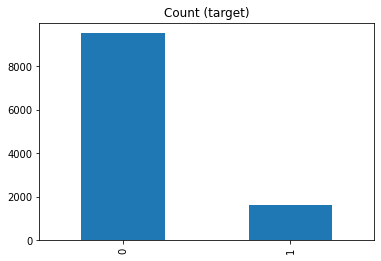

In [ ]:
print(data_train.Best_Performance.value_counts())
data_train.Best_Performance.value_counts().plot(kind='bar', title='Count (target)');

Dari gambar di atas terlihat bahwa terdapat selisih yang sangat besar terhadap class 0 dan 1.
Maka dari itu perlu dilakukan balancing data agar data yang ditrain dapat berjalan dengan adil, tidak terlalu banyak ditrain pada data yang memiliki class mayor.

Random under-sampling:
1    1637
0    1637
Name: Best_Performance, dtype: int64


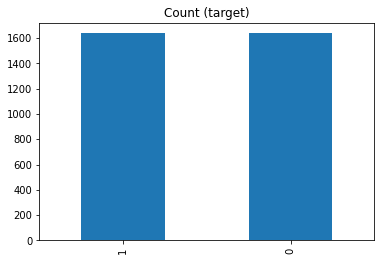

In [ ]:
# Menghitung class 0 dan 1 di feature Best Performance
count_class_0, count_class_1 = data_train.Best_Performance.value_counts()

# Dibagi berdasarkan class
class_0 = data_train[data_train.Best_Performance == 0]
class_1 = data_train[data_train.Best_Performance == 1]

df_class_0_under = class_0.sample(count_class_1, random_state = 0)
df_test_under = pd.concat([df_class_0_under, class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Best_Performance.value_counts())

df_test_under.Best_Performance.value_counts().plot(kind='bar', title='Count (target)');

##Mengubah Feature dengan Tipe Data Kategori Menjadi Data Dummy

In [ ]:
Y = df_test_under.Best_Performance.copy()
X = df_test_under.drop(['Best_Performance'], axis = 1).copy()

num_col = [i for i in X.columns if X[i].dtypes != 'object']
cat_col = [i for i in X.columns if X[i].dtypes == 'object']

X = pd.get_dummies(X, columns = cat_col)
X.head()

,job_duration_in_current_job_level,job_duration_in_current_branch,gender,number_of_dependences,GPA,year_graduated,assign_of_otherposition,annual_leave,sick_leaves,Last_achievement_%,job_level_JG03,job_level_JG04,job_level_JG05,person_level_PG01,person_level_PG02,person_level_PG03,person_level_PG04,person_level_PG05,person_level_PG06,person_level_PG07,person_level_PG08,Employee_type_RM_type_A,Employee_type_RM_type_B,Employee_type_RM_type_C,marital_status_maried(Y/N)_N,marital_status_maried(Y/N)_Y,Education_level_level_1,Education_level_level_3,Education_level_level_4,Education_level_level_5
9968,1.224745,0.707107,1,2,2.96,2007,4,3,0,67.00,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0
1274,1.118034,0.707107,1,0,0.00,2013,0,5,1,59.99,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0
8918,1.322876,0.707107,2,1,3.77,2009,0,2,0,101.35,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0
7854,1.352775,1.224745,1,0,3.00,2012,0,3,4,111.68,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0
10369,1.352775,1.224745,1,0,3.26,2013,0,8,0,93.55,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0


##Model

###Split data, dengan data yang akan ditrain sebesar 70%, dan data yang ditest sebesar 30%

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

###Standar Scaller
Agar rentang data tidak terlalu jauh maka perlu dilakukan standar scaller

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
x_train[num_col] = sc_X.fit_transform(x_train[num_col].copy())
x_test[num_col] = sc_X.transform(x_test[num_col].copy())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

##SVM

In [ ]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train,y_train)
prediksi_train = model.predict(x_test)

##Accuracy, Precicion, Recall, and F1-Score

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score

acc = accuracy_score(prediksi_train, y_test)
rec = recall_score(prediksi_train, y_test)
prec = precision_score(prediksi_train, y_test)
print("Confusion Matrix : \n", confusion_matrix(prediksi_train, y_test))
print('Accuracy : ', acc)
print('Recall : ', rec )
print('Precission : ', prec)

f1_score = 2*(rec*prec)/(rec+prec) #F1 Score = 2 * (Recall*Precission) / (Recall + Precission)
print("f1-score :", f1_score)

Confusion Matrix : 
 [[222 161]
 [289 311]]
Accuracy :  0.5422177009155646
Recall :  0.5183333333333333
Precission :  0.6588983050847458
f1-score : 0.5802238805970148
